In [25]:
!pip install julia

     ---------------------------------------- 67.6/67.6 kB 3.6 MB/s eta 0:00:00


In [1]:
# Packages
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
# Bereitstellung von Julia Aufrufe im Python
from julia.api import Julia
from julia import Main
jl = Julia(compiled_modules=False)

In [1]:
# visualize liest filename von ursprunglichen Beispiel Dateien, aber
# es muss "Beispiel{i}_vektor.txt" vorgeneriert werden (mit w und b)
# dann mit Vektor w und b wird Linie laut Punkten (x1,x2) erstellt
# Zur Plot Erstellung nutzen wir 
#     x1 gleichverteilt aus Bereich [0,10] (10000 Punkten)
#     x2 = -w[0]/w[1]*x1+b/w[1] = -w1/w2*x1+b*x2
# 
# Auch werden Punkten aus Beispiel gezeichnet, 
# wo grüne Punkte haben yi = 1
#    rote Punkte haben yi = -1
def visualize(filename):
    #Vektor w und skalar b
    vektor_filename = filename[0:len(filename)-4]+"_vektor.txt"
    print(vektor_filename)
    print("\n")
    w_b_vector = open(vektor_filename,"r")
    liste = []
    for x in w_b_vector:
        liste.append(x)
    liste[0] = liste[0][0:-1]
    liste[1] = liste[1][0:-1]
    w = [float(liste[0]),float(liste[1])]
    b = float(liste[2])
    w_b_vector.close()
    
    print(w)
    print("\n")
    print(b)
    #Werte fuer visualization
    werte = open(filename,"r")
    xy = []
    for x in werte:
        xy.append(x)
    xy
    x = []
    y = []
    for s in xy:
        s = s[0:-1]
        temp = s.split(" ")
        x.append([float(temp[0]),float(temp[1])])
        y.append(float(temp[2]))
    werte.close()
    #Visualization    
    x1 = np.linspace(0,10,10000)
    x2 = -w[0]/w[1]*x1+b/w[1]
    #plt.xlim(0, 10), plt.ylim(0, 10)
    plt.plot(x1,x2)
    for i in range(len(x)):
        if(y[i] == 1):
            plt.plot(x[i][0],x[i][1],marker = "o",color = "green")
        else:
            plt.plot(x[i][0],x[i][1],marker = "o",color = "red")

    
    plt.show()

Beispiel2_vektor.txt


[-0.4999771128640959, -0.49997711286409563]


-2.9998779353684952


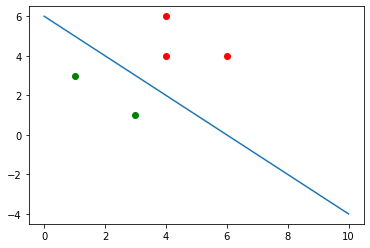

In [22]:
filename = "Beispiel2.txt"

jl.eval('include("jl_script.jl")')
Main.data = filename
stem_list = jl.eval("calculate_write_w_b(data)")

visualize(filename)

In [16]:
def generate_beispiel(filename):
    file = open(filename,"w")
    for i in range(15):
        file.write(str(round(random.uniform(1,3),2)) +" ")
        file.write(str(round(random.uniform(1,10),2)) +" ")
        file.write(str(1) +"\n")
    for i in range(15):
        file.write(str(round(random.uniform(5,10),2)) +" ")
        file.write(str(round(random.uniform(1,10),2)) +" ")
        file.write(str(-1) +"\n")
    file.close()

In [46]:
str(round(random.uniform(1,5),2))

'1.73'

In [17]:
generate_beispiel("Beispiel6.txt")